In [1]:
import numpy  as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt

## Import housing data and do analysis on that data
Each row represents one district. There are 10 attributes: longitude, latitude,  housing_median_age, total_rooms, total_bed rooms, population, households, median_income, median_house_value , and ocean_proximity.

In [2]:
housing_data = pd.read_csv('/home/nova/Documents/DS-AI/ML/Projects/Median_Housing_price_pridiction/housing.csv')
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Let's calculate the total non-nullable feature values

In [3]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


total_bedroom attributes has only has 20433 non-nullable values, when choosing features we need to consider about nullable values

In [4]:
housing_data.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

all attributes, except ocean_proximity are numerical data

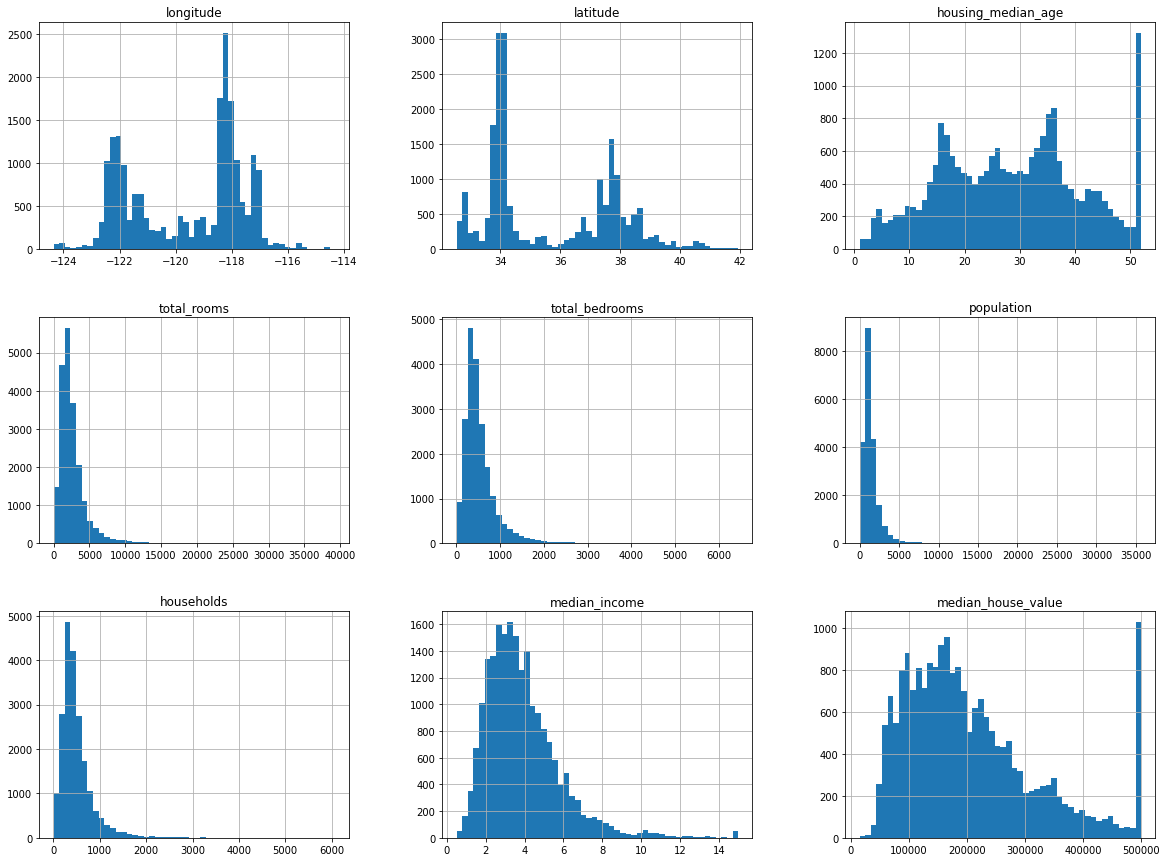

In [5]:
housing_data.hist(bins=50, figsize=(20,15))
plt.show()

Histogram help us to get an idea data to that we want to focus
1. The median attribute not in the units of USD but the numbers represent roughly tens of thousands of dollar
2. The housing median age and the median house value were also capped. This will later rise a problem 
3. These attributes have different scale
4. Many histogram are extend much farther to the right of the median than to the left. This may make it a bit harder the algorithms to detect pattern

## lets create data set (train and test data)

Split our dataset into train, test set with random sampling

In [6]:
train_set, test_set = train_test_split(housing_data, test_size=0.2, random_state=42)

When creating a train/test data split need to careful about stratified sampling over random sampling.

The whole population is divided into homogeneous subgroups called strata, and the right number of instances is sampled from each stratum to guarantee that the test set is representative of the overall population.

Look at the median income attriute, most of the median income values are clustered around 1.5 to 6 ($15,000–$60,000), but some median incomes go far beyond 6. 

It is important to have a sufficient number of instances in your dataset for each stratum, or else the estimate of the stratum’s importance may be biased.

In [7]:
housing_data['income_cat'] = pd.cut(housing_data['median_income'], 
                                                    bins=[0., 1.5, 3.0, 4.5, 6, np.inf],
                                                    labels=[1, 2, 3, 4, 5])

<AxesSubplot:>

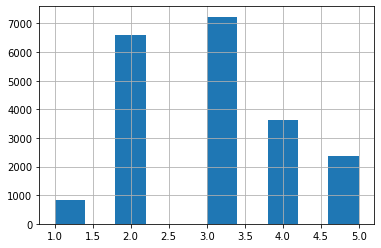

In [8]:
housing_data['income_cat'].hist()

Do stratified sampling based on the income category

In [9]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [10]:
for train_index, test_index in split.split(housing_data, housing_data['income_cat']):
    strat_train_set = housing_data.loc[train_index]
    strat_test_set = housing_data.loc[test_index]

In [11]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

remove the income_cat attribute for data set

In [12]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## Discover and Visualize the Data to Gain Insights

In [13]:
housing_data_copy = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

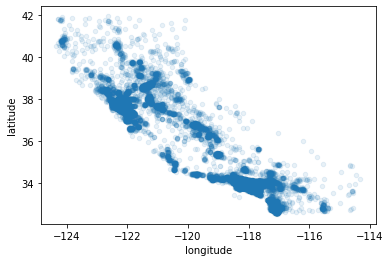

In [14]:
housing_data_copy.plot(kind='scatter', x='longitude', y='latitude', alpha=.1)

This will highlight high density area

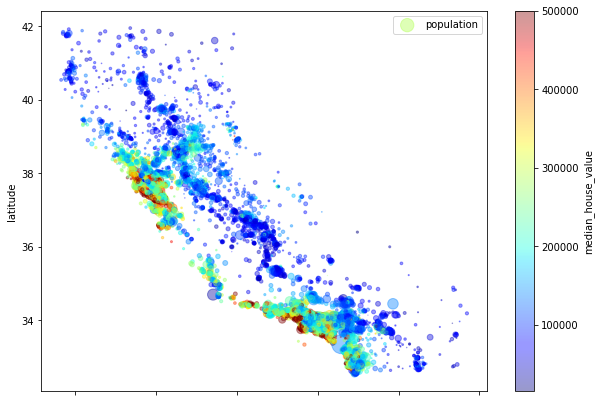

In [15]:
housing_data_copy.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, 
    s=housing_data_copy["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

This will indicate that housing price more related to location especially need to consider bay areas

## Correlations

In [16]:
from pandas.plotting import scatter_matrix
# useful to identify standard correlation coefficient between attributes in the data set 
# since the data set is not too large 

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_bedrooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_bedrooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_bedrooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_bedrooms'>,
        <AxesSubplot:xlabel='total_bedrooms', ylabel='total_bedrooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_bedrooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot

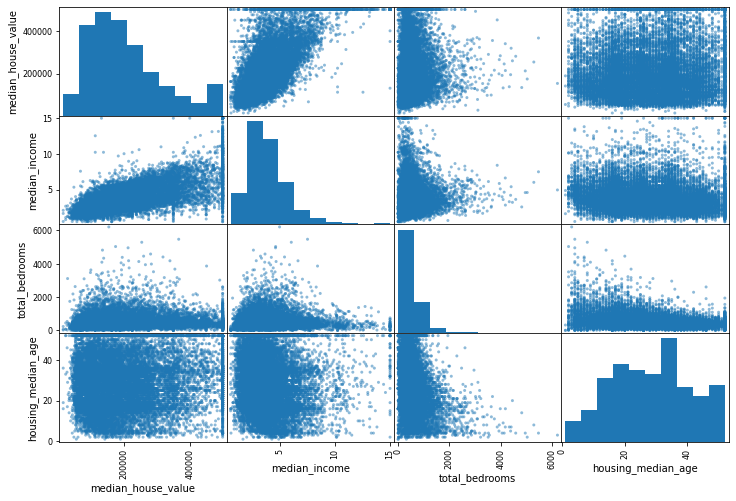

In [17]:
attributes = ['median_house_value', 'median_income', 'total_bedrooms', 'housing_median_age']
scatter_matrix(housing_data_copy[attributes], figsize=(12, 8))

The most promising attribute to predict the median house value is the median income
Note - ignore the diagonal line 

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

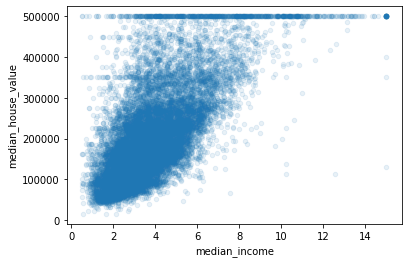

In [18]:
housing_data_copy.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

This plot reveal that the correlation is very strong since there is an upward trend, and indicates that there is a cap around 500k, 450k, 350k and 280k so, when training try to remove this data

## Experimenting with Attribute Combinations
Preparing the data for machine learning algorihm so try to combine attribute and have a look on how they correlated with target variable(in this case, median_house_value)

In [19]:
housing_data_copy["rooms_per_household"] = housing_data_copy["total_rooms"]/housing_data_copy["households"]
housing_data_copy["bedrooms_per_room"] = housing_data_copy["total_bedrooms"]/housing_data_copy["total_rooms"]
housing_data_copy["population_per_household"]=housing_data_copy["population"]/housing_data_copy["households"]

In [20]:
corr_matrix = housing_data_copy.corr()
corr_matrix["median_house_value"].sort_values()

bedrooms_per_room          -0.259984
latitude                   -0.142724
longitude                  -0.047432
population                 -0.026920
population_per_household   -0.021985
total_bedrooms              0.047689
households                  0.064506
housing_median_age          0.114110
total_rooms                 0.135097
rooms_per_household         0.146285
median_income               0.687160
median_house_value          1.000000
Name: median_house_value, dtype: float64

bedrooms_per_room attribue has high negative correlation between median_house_value

The number of rooms per household is also more informative than the total number of rooms in a district

houses with a lower bedroom/room ratio tend to be more expensive

## Prepare the data for machine learning algorithm (univarient linear regression)

In [21]:
# create a copy of dataset and clean it
# remove the target variable (labels) from dataset
data = strat_train_set.drop('median_house_value', axis=1)
# seperate target variable into a series
target = strat_train_set["median_house_value"].copy()

### Clean data

Remove null values - We have identified that the total_bedroom attribute has some null values

In [48]:
# # drop a row with total_bedroom attribute value is null 
# data.dropna(subset=['total_bedrooms'])
# # drop the entire total_bedroom column since we no longer need that
# data.drop('total_bedrooms', axis=1)
# # find the median value
# median = data.total_bedrooms.median()
# # fill the missing values in the training set
# data['total_bedrooms'].fillna(median, inplace=True)

In [22]:
# With SimpleImputer we can take care of missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_num = data.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

# transform feature
X = imputer.transform(housing_num)
# put back to pandas frame
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

### Convert catogorical text data to numeric value

We have idenfied that ocean_proximity is consist of a (catogorical) text value so we need to convert it as a numerical catagory since machine learning algorithm prefer numerical values

We can achive this using one hot representation 

In [23]:
housing_cat = data[["ocean_proximity"]]
housing_cat[:10]

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [24]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [27]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Custom transformer

Our own for tasks such as custom cleanup operations or combining specific attributes.

In [26]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(data.values)

## Feature scalling

We need to scale all the feature before feeding into machine learing algorithm

With the help of MinMaxScaler or StandardScaler we can either normalize or standardize the data

## Transformation

Pipeline class to help with sequences of transformations.

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
('imputer', SimpleImputer(strategy="median")),
('attribs_adder', CombinedAttributesAdder()),
('std_scaler', StandardScaler()),
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

To apply the appropriate transformations (feature scalling) to each column we can use ColumnTransformer

In [32]:
from sklearn.compose import ColumnTransformer
housing_num = data.drop("ocean_proximity", axis=1)
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])
data_prepared = full_pipeline.fit_transform(data)


## Training and evaluating on the training set

In [33]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(data_prepared, target)

LinearRegression()

Try predicting some values

In [35]:
some_data = data.iloc[:5]
some_labels = target.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


Let’s measure this regression model’s RMSE on the whole training set

In [37]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(data_prepared)
lin_mse = mean_squared_error(target, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

The above value indicate that the model is underfitting with data

## Lets try to train with different model

In [38]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(data_prepared, target)
housing_predictions = tree_reg.predict(data_prepared)
tree_mse = mean_squared_error(target, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

This value indicate that the model prone to overfit

## Evaluate with crossvalidation with k-fold cross validation

In [39]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, data_prepared, target, 
scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [40]:
print("Scores:", tree_rmse_scores)
print("Mean:", tree_rmse_scores.mean())
print("Standard deviation:", tree_rmse_scores.std())

Scores: [69376.72377921 66548.03555875 71313.88285418 68990.03677077
 70821.27610517 74780.58710357 71605.90302619 71768.5264785
 77448.58778735 71526.16509163]
Mean: 71417.9724555325
Standard deviation: 2863.3921252010314


In [41]:
lin_scores = cross_val_score(lin_reg, data_prepared, target,
        scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
print("Scores:", lin_rmse_scores)
print("Mean:", lin_rmse_scores.mean())
print("Standard deviation:", lin_rmse_scores.std())

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.674001798342


This experiments indicate that the DecisionTreeRegressor tend to overfit

## Try another algorithm

In [44]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(data_prepared, target)
forest_mse = mean_squared_error(target, housing_predictions)
forest_rmse = np.sqrt(tree_mse)
forest_rmse

0.0

## Fine tune model